In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.io.wavfile import read
import wavfile
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import noisereduce as nr

c:\Users\Kamen\.pyenv\pyenv-win\versions\3.9.12\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train = pd.read_csv("./data/wav_files/train/train_data.csv")
test = pd.read_csv("./data/wav_files/test/test_data.csv")
validation = pd.read_csv("./data/wav_files/validation/validation_data.csv")

In [4]:
def clean_sound(audio): 
    tresh = 1000
    first_non_zero_index = np.where(np.abs(audio) > tresh)[0][0]
    last_non_zero_index = np.where(np.abs(audio[::-1]) > tresh)[0][0]
    trimmed_audio_data = audio[first_non_zero_index:-last_non_zero_index]
    return trimmed_audio_data

[0 0 0 ... 0 0 0] 142464


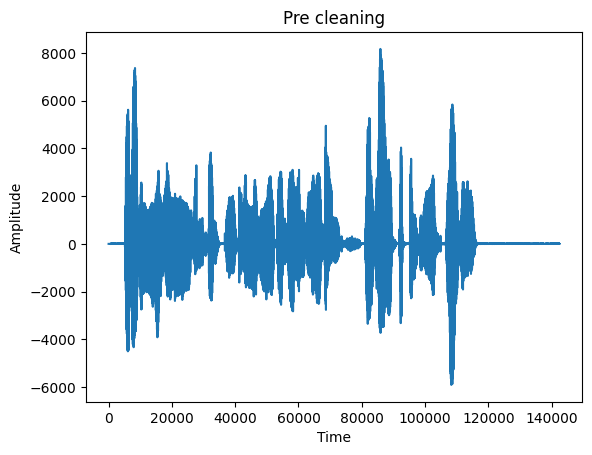

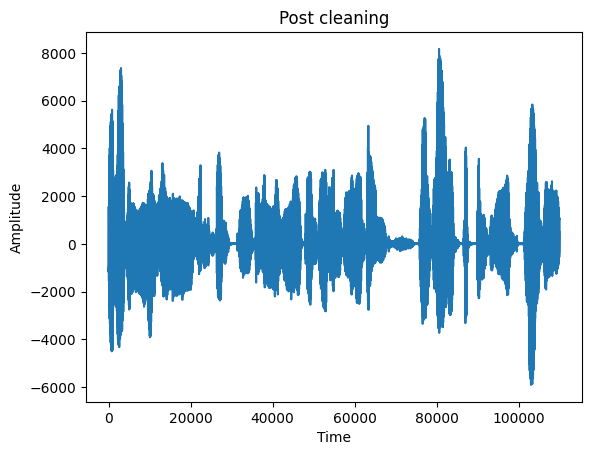

In [5]:
#Pre clean

#wave = read(path + validation['paths'][10000])
wave = read("C:/Users/Kamen/ML/Projet-STT-3795/common_voice_ar_19061960.wav")
sample_rate = wave[0]
audio = wave[1]
print(audio, len(audio))
plt.plot(audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Pre cleaning")
plt.show()

#Post clean
clean_audio = clean_sound(wave[1])
plt.plot(clean_audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Post cleaning")
plt.show()

Remove empty sound from audio files

In [6]:
"""
audio_data_int16 = clean_audio.astype(np.int16)
output_filename = 'output_audio.wav'
print("Array shape:", audio_data_int16.shape)
print("Data type:", audio_data_int16.dtype)
sf.write(output_filename, audio_data_int16, sample_rate)
"""

'\naudio_data_int16 = clean_audio.astype(np.int16)\noutput_filename = \'output_audio.wav\'\nprint("Array shape:", audio_data_int16.shape)\nprint("Data type:", audio_data_int16.dtype)\nsf.write(output_filename, audio_data_int16, sample_rate)\n'

In [8]:
type = ["train", "test", "validation"]
dfs = [train, test, validation]
path = "./data/wav_files/"
path_clean = "./data/wav_files_clean/"
errors = []
for i in range(len(type)):
    curr_df = dfs[i]
    #curr_df['new_paths'] = np.nan
    error = []
    for j in range(len(curr_df)): 
        wav_name = str(curr_df['paths'][j])
        print(wav_name)
        raw_wav_file = path + type[i] + "/" + wav_name 
        wave = read(raw_wav_file)
        sample_rate = wave[0]
        audio = wave[1]   
        audio = nr.reduce_noise(y=audio, sr=sample_rate)  
        try: 
            clean_audio = clean_sound(audio)
        except: 
            error.append((audio, wav_name))
        audio_data_int16 = clean_audio.astype(np.int16)
        #wav_name = wav_name.split("_")[2] + "_" + str(j) + ".wav"
        #curr_df.loc[j, "new_paths"] = wav_name
        output_filename = path_clean + type[i] + "/" +  wav_name
        sf.write(output_filename, audio_data_int16, sample_rate)
    errors.append(error)

common_voice_ar_20401372.wav
common_voice_ar_19216539.wav
common_voice_ar_19375914.wav
common_voice_ar_19220386.wav
common_voice_ar_19803329.wav
common_voice_ar_20026829.wav
common_voice_ar_19529991.wav
common_voice_ar_19083375.wav
common_voice_ar_19380209.wav
common_voice_ar_19476981.wav
common_voice_ar_19205882.wav
common_voice_ar_19204113.wav
common_voice_ar_21100471.wav
common_voice_ar_19850609.wav
common_voice_ar_19285863.wav
common_voice_ar_19471957.wav
common_voice_ar_20312018.wav
common_voice_ar_19285859.wav
common_voice_ar_19541088.wav
common_voice_ar_19220365.wav
common_voice_ar_19651948.wav
common_voice_ar_19231212.wav
common_voice_ar_19647457.wav
common_voice_ar_19212444.wav
common_voice_ar_19233448.wav
common_voice_ar_21262385.wav
common_voice_ar_20907897.wav
common_voice_ar_19222360.wav
common_voice_ar_19205154.wav
common_voice_ar_19236913.wav
common_voice_ar_19533052.wav
common_voice_ar_19382768.wav
common_voice_ar_19228437.wav
common_voice_ar_19236912.wav
common_voice_a

KeyboardInterrupt: 